In [177]:
import pandas as pd
import matplotlib.pyplot as plt

In [178]:
data = pd.read_csv('Gold and silver datasets/Gold_Prices_History_India_Since1979 - Sheet1.csv')

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11749 entries, 0 to 11748
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               11749 non-null  object 
 1   GoldPrice_Gm       11749 non-null  float64
 2   AfterImportDuty    11749 non-null  float64
 3   ConsumerPrice_gst  11749 non-null  float64
 4   Gold916_gst        11749 non-null  float64
 5   GoldPrice_Oz       11749 non-null  float64
dtypes: float64(5), object(1)
memory usage: 550.9+ KB


In [180]:
data.head()

,Date,GoldPrice_Gm,AfterImportDuty,ConsumerPrice_gst,Gold916_gst,GoldPrice_Oz
0,1/12/2024,5475.42,6159.85,6344.65,5811.70,170304.6
1,1/11/2024,5418.07,6095.33,6278.19,5750.82,168520.9
2,1/10/2024,5411.01,6087.39,6270.01,5743.33,168301.2
3,1/9/2024,5437.75,6117.47,6300.99,5771.71,169132.8
4,1/8/2024,5406.18,6081.95,6264.41,5738.20,168150.9


In [181]:
data_subset = data[['Date', 'GoldPrice_Gm']]
data_subset.head()

,Date,GoldPrice_Gm
0,1/12/2024,5475.42
1,1/11/2024,5418.07
2,1/10/2024,5411.01
3,1/9/2024,5437.75
4,1/8/2024,5406.18


In [211]:
data_reverse = data[::-1]

In [212]:
data_subset_reverse = data_subset[::-1]
data_subset_reverse.head()

,Date,GoldPrice_Gm
11748,1/2/1979,57.64
11747,1/3/1979,57.94
11746,1/4/1979,58.25
11745,1/5/1979,59.27
11744,1/8/1979,59.20


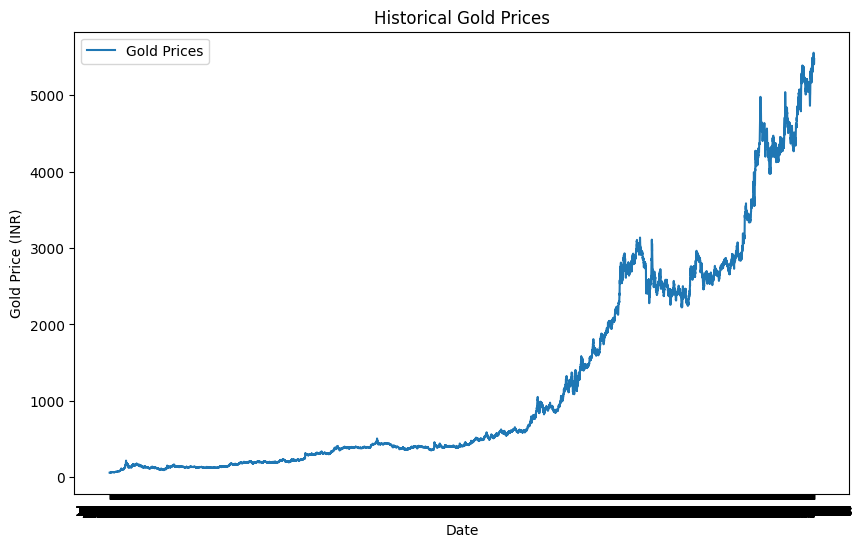

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(data_subset_reverse['Date'], data_subset_reverse['GoldPrice_Gm'], label='Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price (INR)')
plt.title('Historical Gold Prices')
plt.legend()
plt.show()

In [214]:
data_subset_reverse['Date'] = pd.to_datetime(data_subset_reverse['Date'])
data_subset_reverse.head()

,Date,GoldPrice_Gm
11748,1979-01-02,57.64
11747,1979-01-03,57.94
11746,1979-01-04,58.25
11745,1979-01-05,59.27
11744,1979-01-08,59.20


In [215]:
data_subset_reverse.set_index('Date', inplace=True)

In [190]:
data_subset_reverse.isnull().sum()

GoldPrice_Gm    0
dtype: int64

In [191]:
data_subset_reverse['GoldPrice_Gm'].interpolate(method='linear', inplace=True)

In [192]:
data_subset_reverse.duplicated().sum()

1141

In [193]:
data_subset_reverse.tail()

,GoldPrice_Gm
Date,
2024-01-08,5406.18
2024-01-09,5437.75
2024-01-10,5411.01
2024-01-11,5418.07
2024-01-12,5475.42


In [194]:
data_monthly = data_subset_reverse.resample('M').mean()

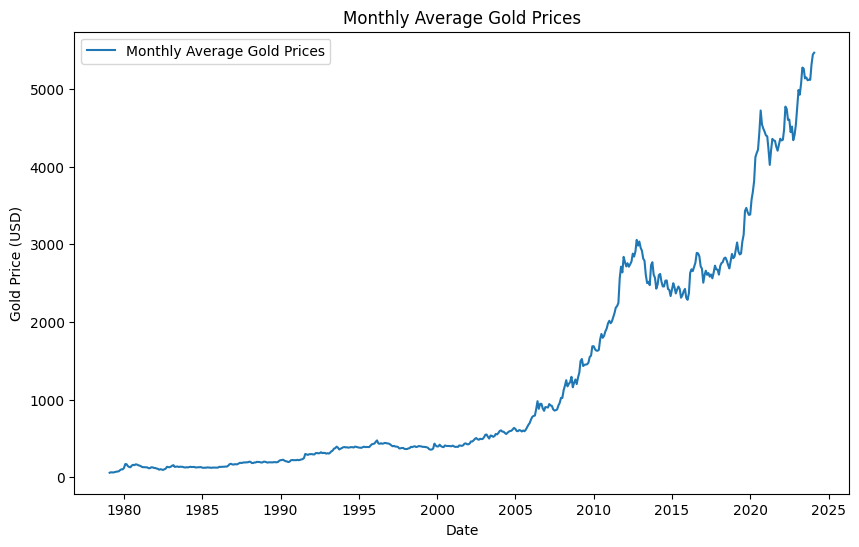

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(data_monthly.index, data_monthly['GoldPrice_Gm'], label='Monthly Average Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Monthly Average Gold Prices')
plt.legend()
plt.show()

In [233]:
weekly_data = data_subset_reverse.resample('W').mean()
weekly_data.head()
daily_data = data_subset_reverse.resample('D').mean()

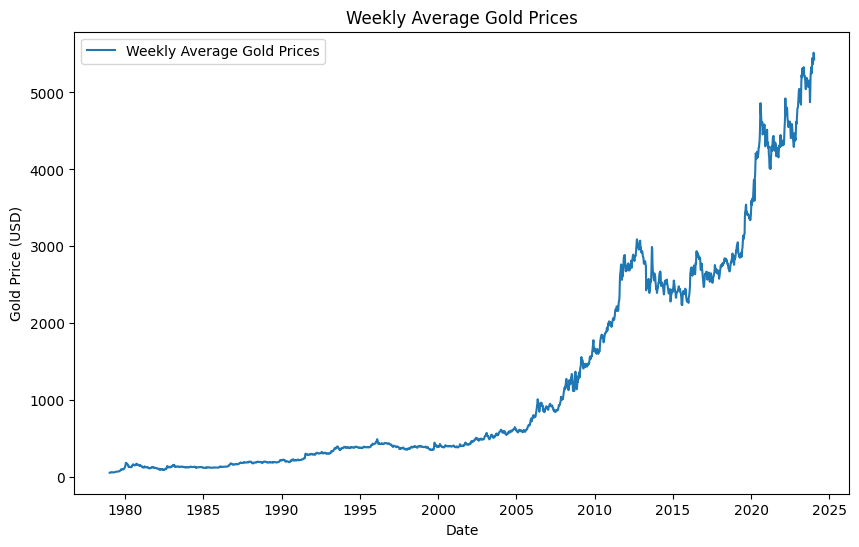

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['GoldPrice_Gm'], label='Weekly Average Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Weekly Average Gold Prices')
plt.legend()
plt.show()

In [198]:
from statsmodels.tsa.arima.model import ARIMA

In [199]:
model = ARIMA(data_monthly['GoldPrice_Gm'], order=(5,1,0)) 
model_fit = model.fit()

In [200]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           GoldPrice_Gm   No. Observations:                  541
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2985.041
Date:                Tue, 30 Jan 2024   AIC                           5982.083
Time:                        20:14:33   BIC                           6007.832
Sample:                    01-31-1979   HQIC                          5992.153
                         - 01-31-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2278      0.027      8.306      0.000       0.174       0.282
ar.L2         -0.0832      0.028     -2.922      0.003      -0.139      -0.027
ar.L3          0.0601      0.026      2.277      0.023       0.008       0.112
ar.L4          0.0072      0.027      0.266      0.790      -0.046       0.060
ar.L5          0.0754      0.026      2.861      0.004       0.024       0.127
sigma2      3705.6787    113.031     32.785      0.000    3484.143    3927.215
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1040.87
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):             117.65   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

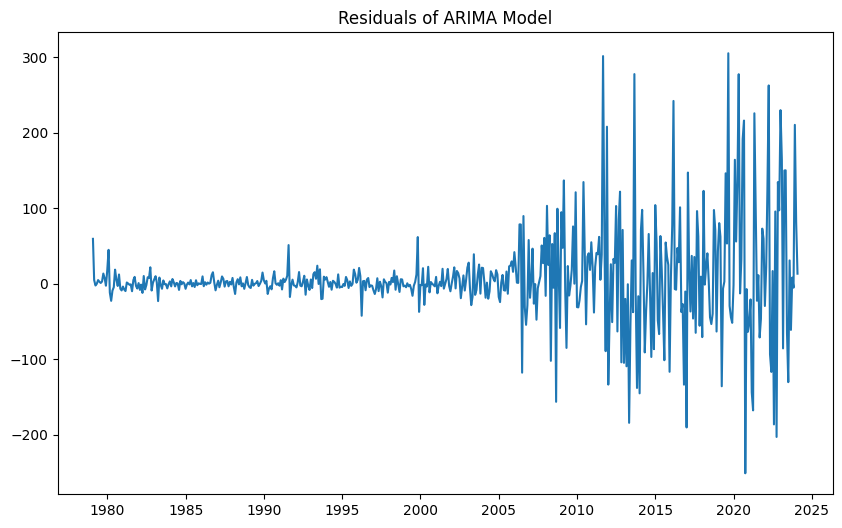

In [201]:
residuals = pd.DataFrame(model_fit.resid)
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

In [202]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

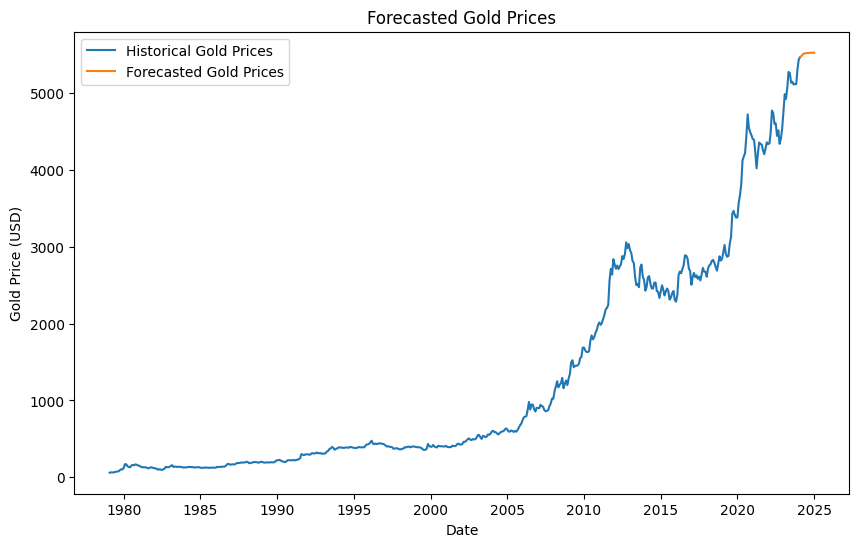

In [203]:
plt.figure(figsize=(10, 6))
plt.plot(data_monthly.index, data_monthly['GoldPrice_Gm'], label='Historical Gold Prices')
plt.plot(pd.date_range(start=data_monthly.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecasted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Forecasted Gold Prices')
plt.legend()
plt.show()

In [204]:
forecast

2024-02-29    5472.940955
2024-03-31    5481.605482
2024-04-30    5500.235803
2024-05-31    5513.991234
2024-06-30    5517.902165
2024-07-31    5519.366160
2024-08-31    5520.988522
2024-09-30    5522.975580
2024-10-31    5524.446997
2024-11-30    5525.019888
2024-12-31    5525.269489
2025-01-31    5525.503785
Freq: M, Name: predicted_mean, dtype: float64

In [205]:
model_w = ARIMA(weekly_data['GoldPrice_Gm'], order=(5,1,0)) 
model_fit_w = model_w.fit()

In [206]:
forecast_steps_w= 4 
forecast_w = model_fit_w.forecast(steps=forecast_steps_w)

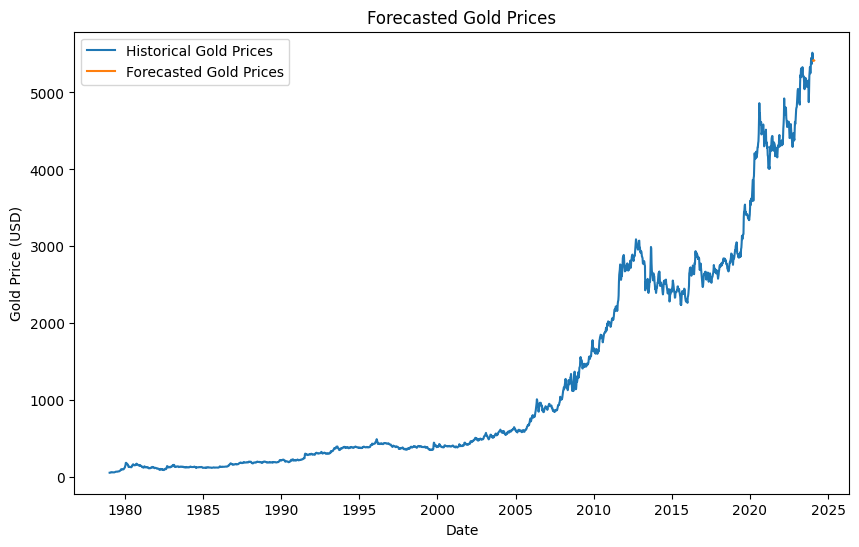

In [207]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_data.index, weekly_data['GoldPrice_Gm'], label='Historical Gold Prices')
plt.plot(pd.date_range(start=weekly_data.index[-1], periods=forecast_steps_w+1, freq='W-MON')[1:], forecast_w, label='Forecasted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Forecasted Gold Prices')
plt.legend()
plt.show()

In [208]:
forecast_w

2024-01-21    5413.334001
2024-01-28    5410.046331
2024-02-04    5411.302295
2024-02-11    5415.596801
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [235]:
model_d = ARIMA(daily_data['GoldPrice_Gm'], order=(5,1,0)) 
model_fit_d = model_d.fit()

In [231]:
forecast_steps_d = 5
forecast_d = model_fit_d.forecast(steps=forecast_steps_d)
forecast_d

2024-01-15    5472.328875
2024-01-16    5472.789617
2024-01-17    5472.623164
2024-01-18    5471.622024
2024-01-19    5472.270470
Freq: B, Name: predicted_mean, dtype: float64

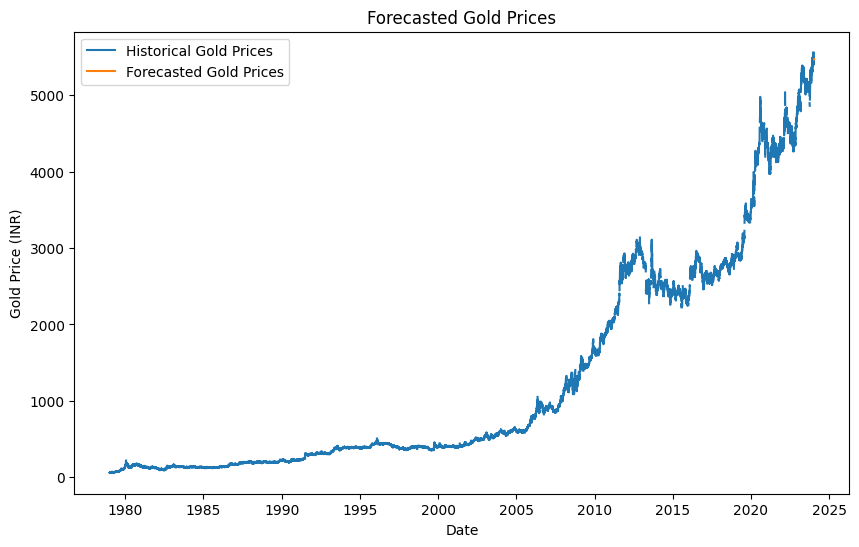

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(daily_data.index, daily_data['GoldPrice_Gm'], label='Historical Gold Prices')
plt.plot(pd.date_range(start=daily_data.index[-1], periods=forecast_steps_d+1, freq='D')[1:], forecast_d, label='Forecasted Gold Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price (INR)')
plt.title('Forecasted Gold Prices')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
train_size = int(len(data_subset_reverse) * 0.7)  
train, test = data_subset_reverse[:train_size], data_subset_reverse[train_size:]

In [82]:
model_test = ARIMA(train['GoldPrice_Gm'], order=(5,1,0))  
model_fit_test = model_test.fit()

In [86]:
forecast_test = model_fit_test.forecast(steps=len(test))

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
rmse = mean_squared_error(test['GoldPrice_Gm'], forecast_test, squared=False)
mae = mean_absolute_error(test['GoldPrice_Gm'], forecast_test)
mse = mean_squared_error(test['GoldPrice_Gm'], forecast_test)
mape = np.mean(np.abs((test['GoldPrice_Gm'] - forecast_test) / test['GoldPrice_Gm'])) * 100

In [92]:
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MSE: %.3f' % mse)
print('Test MAPE: %.3f' % mape)

Test RMSE: 1688.772
Test MAE: 1393.326
Test MSE: 2851950.076
Test MAPE: 38.895
